In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
np.random.seed(7)

In [19]:
class NeuralNet:
    def __init__(self, inputSize, hiddenL1, hiddenL2, outputSize):
        
        #DEFINING NETWORK PARAMETERS
        self.input_size = inputSize
        self.hidden_size1 = hiddenL1
        self.hidden_size2 = hiddenL2
        self.output_size = outputSize
        self.learning_rate = 0.01
        
        #CREATING WEIGHTS AND BIASES
        self.w1 = np.random.randn(self.input_size, self.hidden_size1) * np.sqrt(2 / self.input_size)
        self.w2 = np.random.randn(self.hidden_size1, self.hidden_size2) * np.sqrt(2 / self.hidden_size1)
        self.w3 = np.random.randn(self.hidden_size2, self.output_size) * np.sqrt(2 / self.hidden_size2)
    
        
        self.b3 = np.zeros((1, self.output_size))
        self.b2 = np.zeros((1, self.hidden_size2))
        self.b1 = np.zeros((1, self.hidden_size1))
        
        
    #DEFINING NON LINEARITY AND ITS DERIVATIVE    
    
    def sigmoid(self, n):
        return(1 / (1 + np.exp(-n)))
    
    def sigmoid_prime(self, n):
        return(self.sigmoid(n) * (1 - self.sigmoid(n)))
        
        
    def relu(self, n):
        return np.where(n > 0, n, 0.03 * n)
    
    def relu_prime(self, n):
        return np.where(n > 0, 1.0, 0.03)
    
    def linear(self, n):
        return n
    
    def linear_prime(self, n):
        return 1
    
    def tanh(self, n):
        return np.tanh(n)
    
    def tanh_prime(self, n):
        return (np.ones(n.shape) - (self.tanh(n)) ** 2)
    
    def softmax(self, x):
        """Compute softmax values for each sets of scores in x."""
        return np.divide(np.exp(x), np.sum(np.exp(x), axis=1).reshape(-1, 1))
    
    def softmax_prime(self, x):
        return (self.softmax(x) * (1 - self.softmax(x)))
        

    #NETWORK FEED FORWARD    
    def forward(self, X):
        
        self.lastIn = X
        
        self.z1 = np.dot(X, self.w1) + self.b1
        self.O1 = self.relu(self.z1)
        self.z2 = np.dot(self.O1, self.w2) + self.b2
        self.O2 = self.relu(self.z2)
        self.z3 = np.dot(self.O2, self.w3) + self.b3
        self.O3 = self.sigmoid(self.z3)
        
    #NETWORK FEED BACKWARD    
    def backward(self, X, y):
        
        #USING CHAIN RULE TO CALCULATE ERROR WITH RESPECT TO WEIGHTS AND BIASES
                                   
        self.error3 = (self.O3 - y) * self.sigmoid_prime(self.z3)
        self.pErr_pw3 = np.dot(self.O2.T, self.error3)
                                   
        self.error2 = np.multiply(np.dot(self.error3, self.w3.T), self.relu_prime(self.z2))
        self.pErr_pw2 = np.dot(self.O1.T, self.error2)
                                   
        self.error1 = np.multiply(np.dot(self.error2, self.w2.T), self.relu_prime(self.z1))
        self.pErr_pw1 = np.dot(X.T, self.error1)
        
        
        #UPDATING WEIGHTS AND BIASES BASED ON THE GRADIENT, AND THE PREDEFINED LEARNING RATE
        self.w1 -= self.pErr_pw1 * (self.learning_rate / 30)
        self.w2 -= self.pErr_pw2 * (self.learning_rate / 30)
        self.w3 -= self.pErr_pw3 * (self.learning_rate / 30)
                                   
        self.b3 -= np.array([self.error3.mean(axis = 0)]) * (self.learning_rate / 30)
        self.b2 -= np.array([self.error2.mean(axis = 0)]) * (self.learning_rate / 30)
        self.b1 -= np.array([self.error1.mean(axis = 0)]) * (self.learning_rate / 30)
        
        
    
    def getCost(self, X, y):
        #CALCULATE COST OF OLD WEIGHTS
        self.forward(X)
        self.cost = np.sum((self.O3 - y)**2) / len(y)
        return self.cost
        
    #FUNCTION TO RETURN THE MODEL'S PREDICTION TO A NEW INPUT
    def predict(self, x):
        self.forward(x)
        return self.O3
    
    def train(self, X, y, epochs):
        totDat = np.hstack((X, y))
        batchesOfData = getBatches(totDat)
        for i in range(epochs):
            batchesOfData = getBatches(totDat)
            for batch in batchesOfData:
                self.forward(np.split(batch, [-10], axis=1)[0])
                self.backward(np.split(batch, [-10], axis=1)[0], np.split(batch, [-10], axis=1)[1])
            if(i % 10 == 0):
                print("Cost after epoch ", i + 1, ": ", self.getCost(X, y))

Below, I will create my model

In [20]:
def getBatches(ls):
    np.random.shuffle(ls)
    return(np.split(ls,30))

In [21]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [22]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(-1, 28*28)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [23]:
holder = np.zeros((y_train.shape[0], 10))
counter = 0
for ls in y_train:
    holder[counter][ls] = 1
    counter += 1
y_train = holder

counter = 0
holder = np.zeros((y_test.shape[0], 10))
for ls in y_test:
    holder[counter][ls] = 1
    counter += 1
y_test = holder
    

In [24]:
model = NeuralNet(784, 256, 256, 10)

In [197]:
model.train(x_train, y_train, 21)

Cost after epoch  1 :  0.02967946098897094
Cost after epoch  11 :  0.027184107234220035
Cost after epoch  21 :  0.025316609440023962


In [198]:
results = model.predict(x_test)

In [199]:
model.getCost(x_test, y_test)

0.042357203458813435

In [28]:
results = np.argmax(results, axis=1)

In [192]:
y_test = np.argmax(y_test, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [31]:

equality = results == y_test

In [32]:
fails = np.where(equality == False)

In [33]:
fails

(array([   8,  247,  259,  320,  321,  340,  445,  448,  495,  582,  619,
         659,  684,  691,  717,  720,  740,  810,  938,  947,  951,  956,
         965, 1014, 1032, 1044, 1107, 1112, 1156, 1182, 1194, 1226, 1232,
        1242, 1247, 1260, 1283, 1289, 1319, 1326, 1328, 1414, 1494, 1500,
        1522, 1527, 1530, 1549, 1553, 1609, 1621, 1681, 1754, 1790, 1901,
        1940, 1941, 1952, 1970, 2016, 2035, 2044, 2053, 2070, 2098, 2109,
        2118, 2129, 2130, 2135, 2182, 2185, 2186, 2224, 2266, 2272, 2293,
        2299, 2369, 2371, 2387, 2405, 2406, 2408, 2422, 2433, 2454, 2488,
        2514, 2607, 2648, 2654, 2721, 2730, 2810, 2863, 2877, 2896, 2927,
        2939, 2953, 2995, 3005, 3030, 3060, 3073, 3114, 3117, 3225, 3333,
        3405, 3422, 3503, 3520, 3549, 3558, 3559, 3597, 3681, 3718, 3751,
        3757, 3767, 3776, 3780, 3811, 3818, 3838, 3853, 3869, 3893, 3902,
        3906, 3941, 3976, 4000, 4065, 4075, 4078, 4093, 4163, 4176, 4199,
        4201, 4212, 4224, 4248, 4289, 

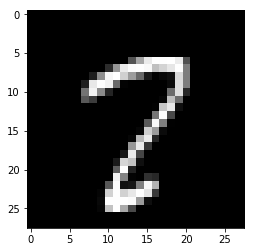

In [566]:
plt.imshow(x_test[9839].reshape(28, 28), cmap='gray')

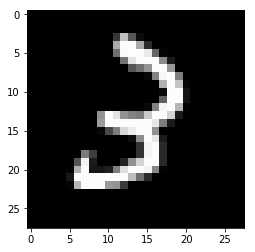

In [213]:
plt.imshow(x_test[63].reshape(28, 28), cmap='gray')

In [565]:
y_test[340]

5

In [61]:
from PIL import Image

In [232]:
im = Image.open('Digits.jpg').convert('L')

In [233]:
imarr = np.asarray(im)

In [234]:
imarr = imarr.reshape(28*28)

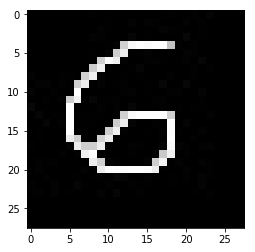

In [235]:
plt.imshow(imarr.reshape(28, 28), cmap='gray')

In [236]:
model.predict(imarr)

array([[0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.90683065e-305,
        6.63569072e-196, 0.00000000e+000, 1.74514468e-262,
        0.00000000e+000]])

In [237]:
np.argmax(model.predict(imarr))

2

In [194]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
counter = 0
holder = np.zeros((y_test.shape[0], 10))
for ls in y_test:
    holder[counter][ls] = 1
    counter += 1
y_test = holder
    